# Phylodynamic model adequacy (test diversification rates)

In [91]:
library(TreeSim)
library(TreePar)
library(NELSI)

In [92]:
set.seed(10)
nspecies <- 100
time <- c(0, 1) # At time 1 in the past, there is a rate shift
rho <- c(0.5, 1) #half of the present day species are samples (rho[1] = 0.5)
lambda <- c(2, 5)# speciation rates, between t[i] and t[i+1] we have a speciation rate lambda
mu <- c(1.5, 0)# extinction rate. Similar notation as lambda
#Simulate a tree with a single rate shift
tree <- sim.rateshift.taxa(nspecies, 1, lambda = lambda, mu = mu, frac = rho, times = time, complete = F)

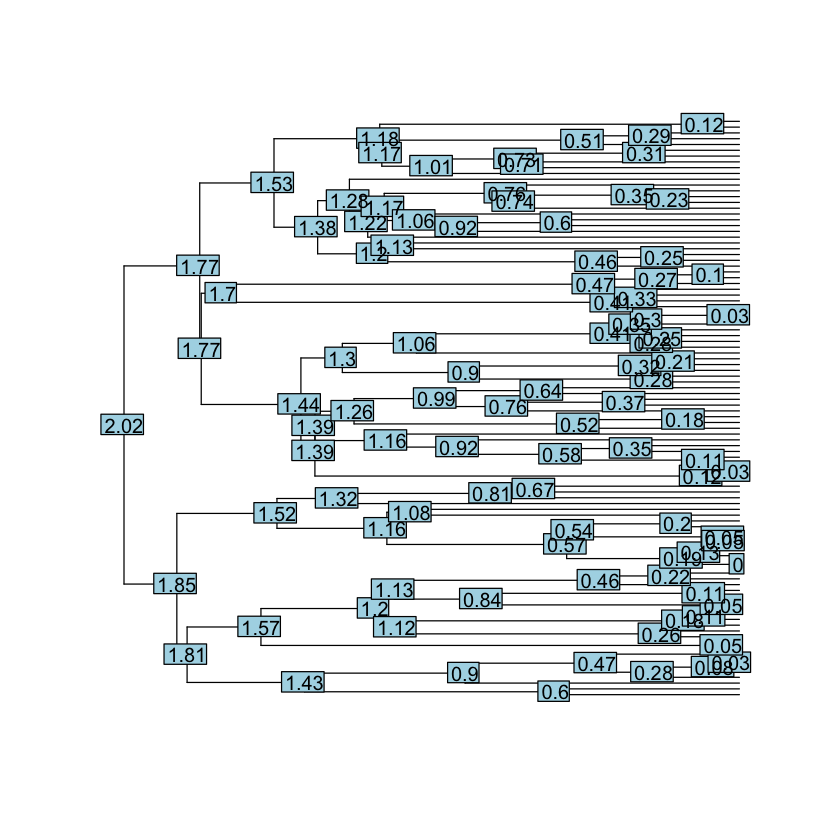

In [93]:
plot(tree[[1]], show.tip.label = F)
nodelabels(round(intnode.times(tree[[1]]), 2))

In [94]:
## Extract speciation times from tree
x <- sort(intnode.times(tree[[1]]), decreasing = T)

In [95]:
# When estimateing the rate shift times, t, based on branching times, x, we allow the shift times to be:
# 0.6, 0.8, 1, 1.2, ... 2.4
start <- 0.4
end <- 2
grid <- 0.2
print(seq(from = start, to = end, by = grid))

[1] 0.4 0.6 0.8 1.0 1.2 1.4 1.6 1.8 2.0


In [101]:
# We fix rho and estimate time, lambda, and mu
res <- bd.shifts.optim(x, c(rho, 1), grid, start, end)[[2]]

[1] "startest"
[1] "test"
[1] 1.0 0.4
[1] 6.368305e+01 9.219610e-01 2.805139e-08 2.303792e-01 2.438249e+00
[6] 4.000000e-01
[1] 1.0 0.6
[1] 6.242244e+01 9.282312e-01 1.973013e-08 2.220083e-01 2.942733e+00
[6] 6.000000e-01
[1] 1.0 0.8
[1] 6.144315e+01 8.288173e-01 4.679411e-08 4.893440e-01 3.422076e+00
[6] 8.000000e-01
[1] 1 1
[1] 60.6940763  0.6831439  0.1889654  0.8056904  3.6622060  1.0000000
[1] 1.0 1.2
[1] 6.389500e+01 3.188225e-01 3.537533e-07 1.465373e+00 3.295377e+00
[6] 1.200000e+00
[1] 1.0 1.4
[1] 6.476335e+01 1.601990e-01 1.288137e-06 1.689515e+00 3.162373e+00
[6] 1.400000e+00
[1] 1.0 1.6
[1] 6.523679e+01 6.785847e-02 1.574079e-06 1.800323e+00 3.254172e+00
[6] 1.600000e+00
[1] 1.0 1.8
[1]  6.422557e+01  3.457427e-08  2.521095e+00  1.867168e+00 -1.225118e+01
[6]  1.800000e+00
[1] 1 2
[1] 6.567651e+01 5.031823e-03 1.711228e-05 1.874485e+00 1.002251e-04
[6] 2.000000e+00
[[1]]
[1] 6.574452e+01 2.508937e-07 1.877696e+00

[[2]]
[1] 60.6940763  0.6831439  0.1889654  0.8056904  3.662

In [111]:
print(res)
print('Turnovers')
print(res[[2]][2:3])
print('Net diversification')
print(res[[2]][4:5])

[[1]]
[1] 6.574452e+01 2.508937e-07 1.877696e+00

[[2]]
[1] 60.6940763  0.6831439  0.1889654  0.8056904  3.6622060  1.0000000

[[3]]
[1] 5.982266e+01 8.284403e-01 3.706772e-07 2.460350e-06 4.945623e-01
[6] 5.902695e+00 3.391462e+00 1.000000e+00 1.200000e+00

[1] "Turnovers"
[1] 0.6831439 0.1889654
[1] "Net diversification"
[1] 0.8056904 3.6622060


In [109]:
# simulation vaules:
# Turnover (extinction/speciation):
mu/lambda

# net diversification
# speciation - extinction
lambda - mu

[1] 0.75 0.00

[1] 0.5 5.0

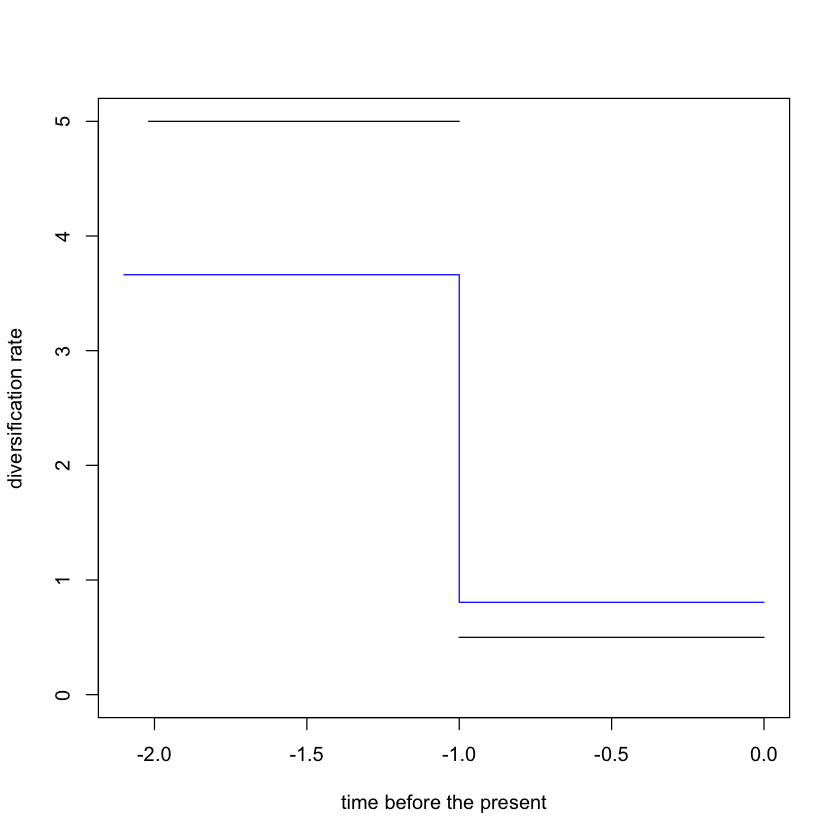

In [116]:
bd.shifts.plot(list(res), 1, 2.1, 0, 5)
lines(c(-max(x), -time[2]), c((lambda - mu)[2], (lambda - mu)[2]))
lines(c(-time[2], 0), c((lambda - mu)[1], (lambda - mu)[1]))

In [117]:
#Simulate 1 trees with no rate shifts

In [262]:
rho <- 0.5
lambda <- 2
mu <- 0.5
print('turnover')
mu / lambda
print('net diversification')
lambda - mu

[1] "turnover"


[1] 0.25

[1] "net diversification"


[1] 1.5

In [263]:
constant_trees <- sim.bd.taxa.age(n = 100, numbsim = 1, lambda, mu, frac = rho, age = 100)
#plot(constant_trees[[1]], show.tip.label = F)

In [266]:
# Fit rate-shift models 
x <- sort(intnode.times(constant_trees[[1]]))
start <- 10
end <- 100
grid <- 5
res <- bd.shifts.optim(x, c(rho, 1, 1), grid, start, end)[[2]]

[1] "startest"
[1] "test"
[1]  1 10
[1] 85.4706904  0.2986178  0.2986178  1.3363551  1.3363551 10.0000000
[1]  1 15
[1] 85.4706904  0.2986178  0.2986178  1.3363551  1.3363551 15.0000000
[1]  1 20
[1] 85.4706904  0.2986178  0.2986178  1.3363551  1.3363551 20.0000000
[1]  1 25
[1] 85.4706904  0.2986178  0.2986178  1.3363551  1.3363551 25.0000000
[1]  1 30
[1] 85.4706904  0.2986178  0.2986178  1.3363551  1.3363551 30.0000000
[1]  1 35
[1] 85.4706904  0.2986178  0.2986178  1.3363551  1.3363551 35.0000000
[1]  1 40
[1] 85.4706904  0.2986178  0.2986178  1.3363551  1.3363551 40.0000000
[1]  1 45
[1] 85.4706904  0.2986178  0.2986178  1.3363551  1.3363551 45.0000000
[1]  1 50
[1] 85.4706904  0.2986178  0.2986178  1.3363551  1.3363551 50.0000000
[1]  1 55
[1] 85.4706904  0.2986178  0.2986178  1.3363551  1.3363551 55.0000000
[1]  1 60
[1] 85.4706904  0.2986178  0.2986178  1.3363551  1.3363551 60.0000000
[1]  1 65
[1] 85.4706904  0.2986178  0.2986178  1.3363551  1.3363551 65.0000000
[1]  1 70
[1] 

In [267]:
res

[[1]]
[1] 85.4706904  0.2986178  1.3363551

[[2]]
[1] 85.4706904  0.2986178  0.2986178  1.3363551  1.3363551 10.0000000

[[3]]
[1] 85.4706903  0.2988449  0.3253124  0.3253124  1.3362907  1.3630497  1.3630497
[8] 10.0000000 15.0000000

In [277]:
# Pull out lambda and mu for 0 rate shifts
turnover_est_0 <- res[[1]][2]
net_div_0 <- res[[1]][3]

lambda_est_0 <- net_div_0 / (1 - turnover_est_0)
mu_est_0 <- lambda_est_0 * turnover_est_0

lambda_est_0
mu_est_0

# Pull out lambda and mu for 1 rate shift
# For time more recent than ...?
turnover_est_1_1 <- res[[2]][2]
net_div_1_1 <- res[[2]][4]

lambda_est_1_1 <- net_div_1_1 / (1 - turnover_est_1_1)
mu_est_1_1 <- lambda_est_1_1 * turnover_est_1_1

lambda_est_1_1
mu_est_1_1
###
turnover_est_1_2 <- res[[2]][3]
net_div_1_2 <- res[[2]][5]

lambda_est_1_2 <- net_div_1_2 / (1 - turnover_est_1_2)
mu_est_1_2 <- lambda_est_1_2 * turnover_est_1_2

lambda_est_1_2
mu_est_1_2




[1] 1.905317

[1] 0.5689615

[1] 1.905317

[1] 0.5689615

[1] 1.905317

[1] 0.5689615

In [302]:
# Simulate 100 trees using 0 and 1 rate shifts
trees_0_shifts <- sim.bd.taxa(n = 100, numbsim = 100, lambda = lambda_est_0, mu = mu_est_0, frac = rho, complete = F)

In [304]:
likelihoods_simulations <- matrix(NA, 100, 3)
i <- 1
for(i in 1:length(trees_0_shifts)){
    tr_times <- sort(intnode.times(trees_0_shifts[[i]]), decreasing = T)
    fit_shifts <- bd.shifts.optim(x = tr_times, sampling = c(rho, 1, 1), start = start, end = end, grid = grid)[[2]]
    likelihoods_simulations[i, ] <- sapply(1:length(fit_shifts), function(x) fit_shifts[[x]][1])
}

[1] "startest"
[1] "test"
[1]  1 10
[1] 81.5422530  0.4975308  0.4975308  1.1858496  1.1858496 10.0000000
[1]  1 15
[1] 81.5422530  0.4975308  0.4975308  1.1858496  1.1858496 15.0000000
[1]  1 20
[1] 81.5422530  0.4975308  0.4975308  1.1858496  1.1858496 20.0000000
[1]  1 25
[1] 81.5422530  0.4975308  0.4975308  1.1858496  1.1858496 25.0000000
[1]  1 30
[1] 81.5422530  0.4975308  0.4975308  1.1858496  1.1858496 30.0000000
[1]  1 35
[1] 81.5422530  0.4975308  0.4975308  1.1858496  1.1858496 35.0000000
[1]  1 40
[1] 81.5422530  0.4975308  0.4975308  1.1858496  1.1858496 40.0000000
[1]  1 45
[1] 81.5422530  0.4975308  0.4975308  1.1858496  1.1858496 45.0000000
[1]  1 50
[1] 81.5422530  0.4975308  0.4975308  1.1858496  1.1858496 50.0000000
[1]  1 55
[1] 81.5422530  0.4975308  0.4975308  1.1858496  1.1858496 55.0000000
[1]  1 60
[1] 81.5422530  0.4975308  0.4975308  1.1858496  1.1858496 60.0000000
[1]  1 65
[1] 81.5422530  0.4975308  0.4975308  1.1858496  1.1858496 65.0000000
[1]  1 70
[1] 

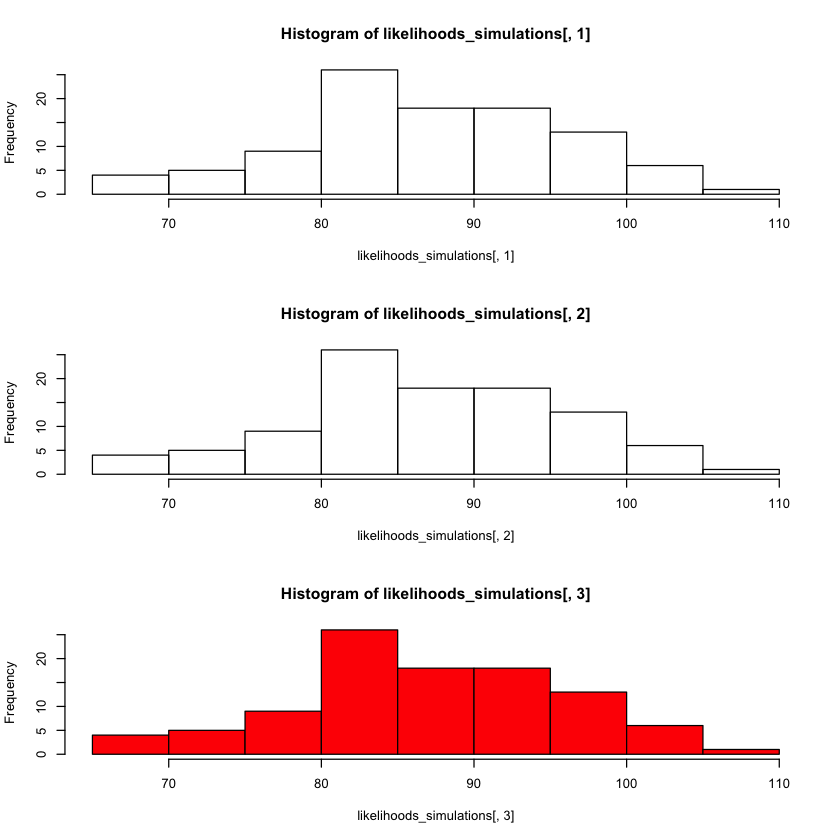

In [309]:
par(mfrow = c(3, 1))
hist(likelihoods_simulations[, 1])
hist(likelihoods_simulations[, 2])
hist(likelihoods_simulations[, 3], col = 'red')

In [306]:
# Do thesame for trees with two and three rate shifts as estimated for the 'empirical' tree

In [312]:
tail(likelihoods_simulations)

"[95,]",86.81909,86.81909,86.81909
"[96,]",87.96322,87.96322,87.96322
"[97,]",96.72789,96.72789,96.72789
"[98,]",98.39671,98.39671,98.39671
"[99,]",97.89655,97.89655,97.89655
"[100,]",83.21447,83.21447,83.21447


In [311]:
res

[[1]]
[1] 85.4706904  0.2986178  1.3363551

[[2]]
[1] 85.4706904  0.2986178  0.2986178  1.3363551  1.3363551 10.0000000

[[3]]
[1] 85.4706903  0.2988449  0.3253124  0.3253124  1.3362907  1.3630497  1.3630497
[8] 10.0000000 15.0000000